In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# import mnist data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape([-1,28,28,1])
x_test = x_test.reshape([-1,28,28,1])

In [3]:
tf.keras.backend.clear_session()
inputs = tf.keras.Input(shape=(28,28,1))  # keras Input returns a placeholder tensor
c1 = tf.keras.layers.Conv2D(10, kernel_size=[5,5], padding='valid', 
                            input_shape=(28, 28, 1), activation='relu')(inputs)
m1 = tf.keras.layers.MaxPool2D((2, 2), padding='valid')(c1)
x = tf.keras.layers.Flatten()(m1)
d1 = tf.keras.layers.Dense(64, activation='relu')(x)
d2 = tf.keras.layers.Dense(64, activation='relu')(d1)
predictions = tf.keras.layers.Dense(10, activation='softmax')(d2)

In [4]:
model = tf.keras.Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1440)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                92224     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total para

In [7]:
model.fit(x_train, y_train, epochs=5, batch_size=32)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 35s 587us/step - loss: 0.0222 - acc: 0.9929
Epoch 2/5
60000/60000 [==============================] - 35s 579us/step - loss: 0.0173 - acc: 0.9943
Epoch 3/5
60000/60000 [==============================] - 35s 578us/step - loss: 0.0145 - acc: 0.9950
Epoch 4/5
60000/60000 [==============================] - 35s 577us/step - loss: 0.0126 - acc: 0.9959
Epoch 5/5
10000/10000 [==============================] - 3s 325us/step


[0.06389692387172254, 0.9835]

# Visualize intermediate layers

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_layer(model, layer_index, img):
    # create model with desired layer to visualize as output
    model_vis = tf.keras.Model(inputs=inputs, outputs=model.get_layer(index=layer_index).output)
    img_layer = model_vis.predict(img.reshape([-1,28,28,1]))
    print(img_layer.shape)
    # plot
    plt.figure(1, figsize=(16, 9))
    nb_filters = model.get_layer(index=1).output_shape[-1]
    for i in range(nb_filters):
        plt.subplot(3, np.ceil(nb_filters/2),i+1)
        plt.imshow(img_layer[0,:,:,i])
        plt.title("filter " + str(i+1))
    plt.subplot(3,np.ceil(nb_filters/2),nb_filters+1)
    plt.imshow(img)
    plt.title("original image")
    plt.show()

(1, 24, 24, 10)


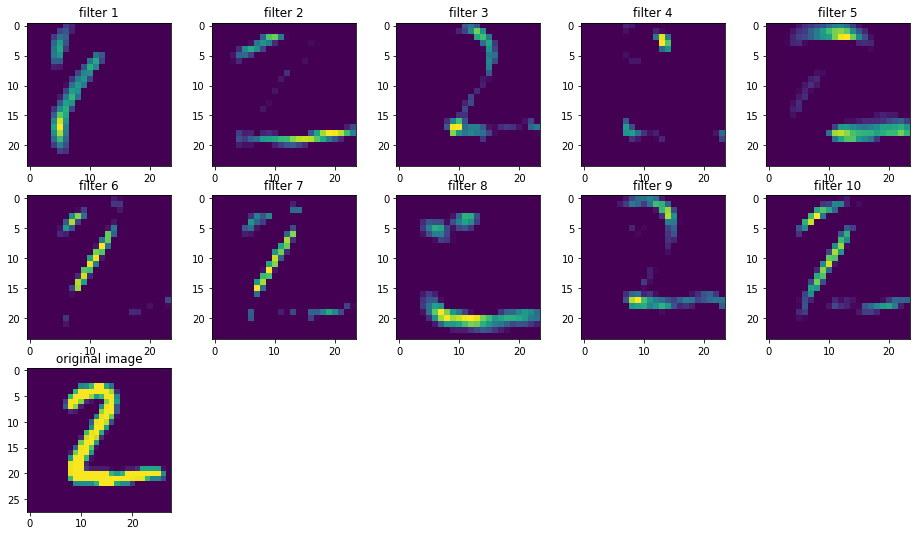

In [51]:
# example:
img = x_test[1].reshape([28,28])
img_label = y_test[1]
layer_index = 1 # 1st convolutional layer
visualize_layer(model, layer_index, img)

# Saliency map

In [64]:
grad = tf.gradients(predictions,inputs)
salienced_img = ksess.run(grad, feed_dict={inputs:[x_test[1]]})

In [87]:
def saliency_map(model, img):
    ksess = tf.keras.backend.get_session()
    grad = tf.gradients(model.output, model.input, stop_gradients)
    salienced_img = ksess.run(grad, feed_dict={inputs:img.reshape([-1,28,28,1])})
    # plot
    plt.subplot(1,2,1)
    plt.imshow(salienced_img[0].reshape([28,28]))
    plt.subplot(1,2,2)
    plt.imshow(img)
    plt.show()

4 4


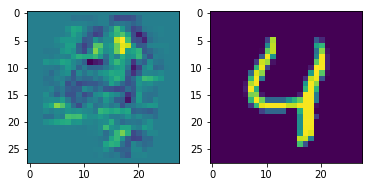

In [93]:
# example:
i = 4
img = x_test[i].reshape([28,28])
img_label = y_test[i]
layer_index = 1 # 1st convolutional layer
print(y_test[i], np.argmax(model.predict(x_test[i].reshape([-1,28,28,1]))))
saliency_map(model, img)

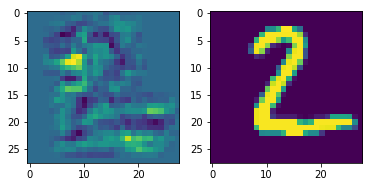

In [72]:
# example:
i = 1
img = x_test[i].reshape([28,28])
img_label = y_test[i]
layer_index = 1 # 1st convolutional layer
print(y_test[i], np.argmax(model.predict(x_test[i].reshape([-1,28,28,1]))))
saliency_map(model, img)